In [1]:
import pygsp as p

import pandas as pd

import numpy as np
from numpy.linalg import matrix_rank, inv, pinv

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import cv2

from scipy import fft

from scipy.sparse.linalg import eigs
from scipy.linalg import eig
from scipy.optimize import linprog, minimize, Bounds

from spielman_learning import *

In [2]:
from ripser import ripser
from persim import plot_diagrams

In [3]:
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'Class']
dataset = pd.read_csv('data/iris/iris.csv', names = names)[::4]
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa


In [4]:
clf_signal = dataset['Class'].values.copy()
clf_signal[clf_signal == 'Iris-setosa'] = 1
clf_signal[clf_signal == 'Iris-versicolor'] = 2
clf_signal[clf_signal == 'Iris-virginica'] = 3

In [5]:
len(dataset)

38

In [6]:
s = np.array([dataset[ni] for ni in names[:-1]]).T
L0 = np.ones((len(dataset), len(dataset)))

In [7]:
%%time
y, ws = algorithm(s, L0, 2, N = 100)

L minimized, current iteration: 0 out of 2
Y minimized, current iteration: 0 out of 2
L minimized, current iteration: 1 out of 2
Y minimized, current iteration: 1 out of 2
CPU times: user 1min 20s, sys: 578 ms, total: 1min 21s
Wall time: 1min 7s


In [8]:
n1, n2, n3 = len(clf_signal[clf_signal == 1]), len(clf_signal[clf_signal == 2]), len(clf_signal[clf_signal == 3])

In [9]:
cys = np.concatenate([np.linspace(0, 1, num = n1), np.linspace(0, 1, num = n2), np.linspace(0, 1, num = n3)])

In [10]:
coords = np.array([clf_signal, cys]).T

In [11]:
wws = ws.copy()
W, ds = vector_to_matrix(len(dataset), wws)
# norm_d = np.diag([1/(d ** 0.5) for d in ds])
# W = norm_d @ W @ norm_d
W_max, W_min = np.max(W), np.min(W)
W[np.isclose(W, 0, atol = 0.18)] = 0
G = p.graphs.Graph(W)
G.set_coordinates('spring', seed = 12345)

In [12]:
G.compute_fourier_basis()
print('First eigenvectors of G.L: ' + str(G.e[:5])) #multiplicidade do 0 é o número de componentes conexas

First eigenvectors of G.L: [0.00000000e+00 4.96796749e-16 1.24589586e-02 2.26744568e-01
 3.93344484e-01]


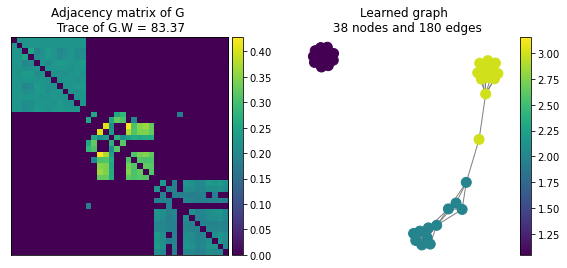

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))

adj = ax[0].matshow(G.W.todense())

divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size = '5%', pad = 0.05)
fig.colorbar(adj, cax, orientation = 'vertical')
ax[0].set_xticks([])
ax[0].set_yticks([])

a = G.plot_signal(clf_signal, ax = ax[1])
ax[1].axis('off')

ax[0].set_title(f'Adjacency matrix of G \n Trace of G.W = %s' % (np.round(np.trace(G.L.todense()), 2)))
ax[1].set_title('Learned graph \n %s nodes and %s edges' % (G.N, G.Ne))


plt.show()